<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 5- 
* Added to assignment 4 last code.
* Added image normalization, L2 regularization and Relu after batch norm iteratively.
* Added code to save and load model with highest val. accuracy.
* Added code to find out and plot, 25 top misclassified images.
  
### Learnings and conclusion- 
* Adding regularization, reduces over fitting, but not as much as when dropout was being used.
* comparison - without dropout/regularization < with only regularization < with dropout.
* In my view, dropout can be used instead of L2 regularization. L1 regularization can be used though to reduce #params/kernels.
* relu after batch norm doesn't effect anything.
* Tried normalizing only train images and not test images. It reduces accuracy too much. So, I think normalizing both is required, because if only train is normalized then we are training on smaller numerical nos, but trying to predict larger numerical nos in test set.

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import regularizers

from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


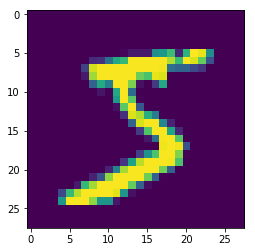

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
#### Normalizing train as well as test images ####

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
batchX, batchy = iterator.next()

iterator_test = datagen.flow(X_test, y_test, batch_size=len(X_test), shuffle=False)
batchX_t, batchy_t = iterator_test.next()

print(batchX.shape, batchX.mean(), batchX.std())
print(batchX_t.shape, batchX_t.mean(), batchX_t.std())

Data Generator mean=0.131, std=0.308
(60000, 28, 28, 1) -4.9324944e-07 0.9999959
(10000, 28, 28, 1) 0.006017289 1.0076967


In [7]:
#### testing, no effect on Y labels before and after normaization ####

print(y_train[:10])
print(batchy[:10])
print(y_test[:10])
print(batchy_t[:10])

[5 0 4 1 9 2 1 3 1 4]
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(batchy, 10)
Y_test = np_utils.to_categorical(batchy_t, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(18, 3, 3, kernel_regularizer=regularizers.l2(0.001), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(18, 1, 1, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Convolution2D(23, 3, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))
model.add(Convolution2D(10, 3, kernel_regularizer=regularizers.l2(0.001)))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (1, 1), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(23, (3, 3), kernel_regularizer=<keras.reg...)`


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 18)        72        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 18)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 18)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 23)        3749      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 23)        92        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 23)        0         
__________

In [12]:

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# checkpoint for best model
# filepath="weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5"
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, LearningRateScheduler(scheduler, verbose=1)]

model.fit(batchX, Y_train, batch_size=32, epochs=40, verbose=1, validation_data=(batchX_t, Y_test), callbacks=callbacks_list)




Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 26s 431us/step - loss: 0.2544 - acc: 0.9553 - val_loss: 0.2240 - val_acc: 0.9569

Epoch 00001: val_acc improved from -inf to 0.95690, saving model to weights.best.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 23s 383us/step - loss: 0.1501 - acc: 0.9771 - val_loss: 0.1376 - val_acc: 0.9784

Epoch 00002: val_acc improved from 0.95690 to 0.97840, saving model to weights.best.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 23s 384us/step - loss: 0.1299 - acc: 0.9790 - val_loss: 0.1153 - val_acc: 0.9835

Epoch 00003: val_acc improved from 0.97840 to 0.98350, saving model to weights.best.hdf5


In [0]:
# load weights of best model
model.load_weights("weights.best.hdf5")

In [0]:
score = model.evaluate(batchX_t, Y_test, verbose=0)

In [15]:
print(score)

[0.039042757520079616, 0.9944]


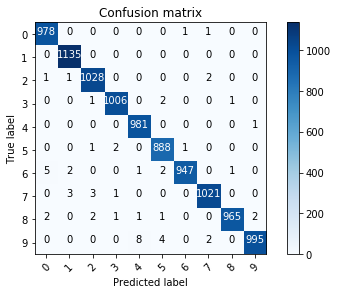

In [16]:
#### plotting the confusion matrix on validation data ####

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(batchX_t)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

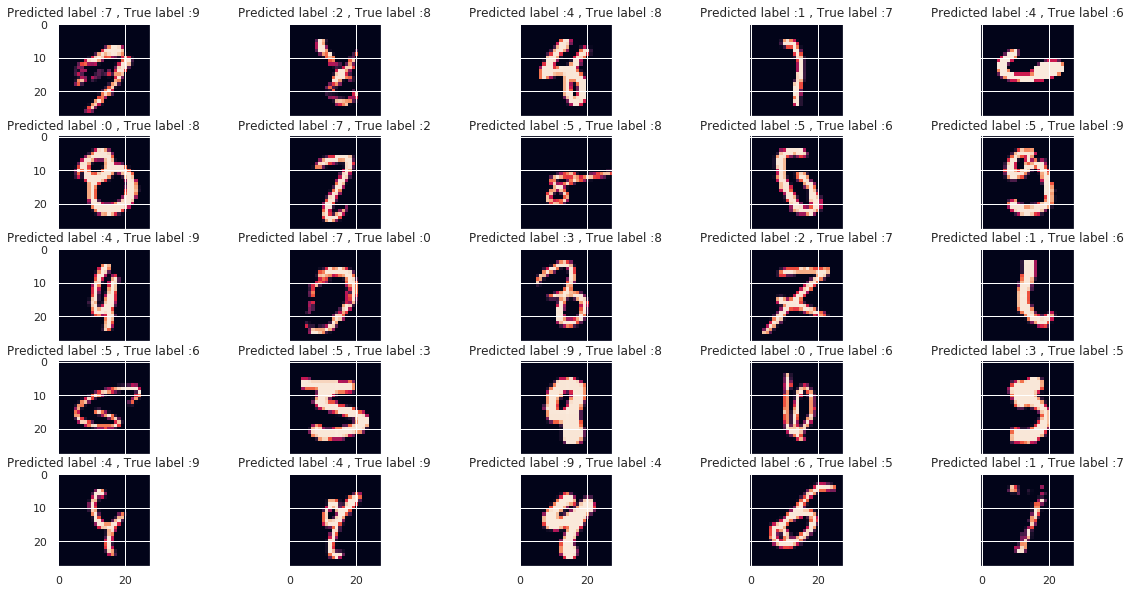

In [17]:
#### plotting 25 top misclassified images in validation set ####

errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = batchX_t[errors]

sns.set(rc={'figure.figsize':(20,10)})

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 25 images with their predicted and real labels"""
    n = 0
    nrows = 5
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{} , True label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-25:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)


In [18]:
len(Y_pred_classes_errors)

56